# Rich Output

In Python, objects can declare their textual representation using the `__repr__` method.  IPython expands on this idea and allows objects to declare other, rich representations including:

* HTML
* JSON
* PNG
* JPEG
* SVG
* LaTeX

A single object can declare some or all of these representations; all are handled by IPython's *display system*. This Notebook shows how you can use this display system to incorporate a broad range of content into your Notebooks.

## Basic display imports

The `display` function is a general purpose tool for displaying different representations of objects. Think of it as `print` for these rich representations.

In [1]:
from IPython.display import display

A few points:

* Calling `display` on an object will send **all** possible representations to the Notebook.
* These representations are stored in the Notebook document.
* In general the Notebook will use the richest available representation.

If you want to display a particular representation, there are specific functions for that:

In [2]:
from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)

## Images

To work with images (JPEG, PNG) use the `Image` class.

In [3]:
from IPython.display import Image

In [4]:
i = Image(filename='../images/ipython_logo.png')

Returning an `Image` object from an expression will automatically display it:

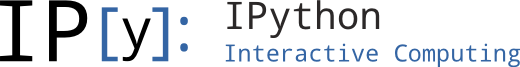

In [5]:
i

Or you can pass an object with a rich representation to `display`:

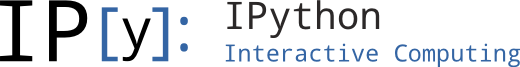

In [6]:
display(i)

An image can also be displayed from raw data or a URL.

In [7]:
Image(url='http://python.org/images/python-logo.gif')

SVG images are also supported out of the box.

In [8]:
from IPython.display import SVG
SVG(filename='../images/python_logo.svg')

### Embedded vs non-embedded Images

By default, image data is embedded in the notebook document so that the images can be viewed offline. However it is also possible to tell the `Image` class to only store a *link* to the image. Let's see how this works using a webcam at Berkeley.

In [9]:
from IPython.display import Image
img_url = 'http://www.lawrencehallofscience.org/static/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

# by default Image data are embedded
Embed      = Image(img_url)

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url=img_url)

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url=img_url, embed=True)

Here is the embedded version. Note that this image was pulled from the webcam when this code cell was originally run and stored in the Notebook. Unless we rerun this cell, this is not todays image.

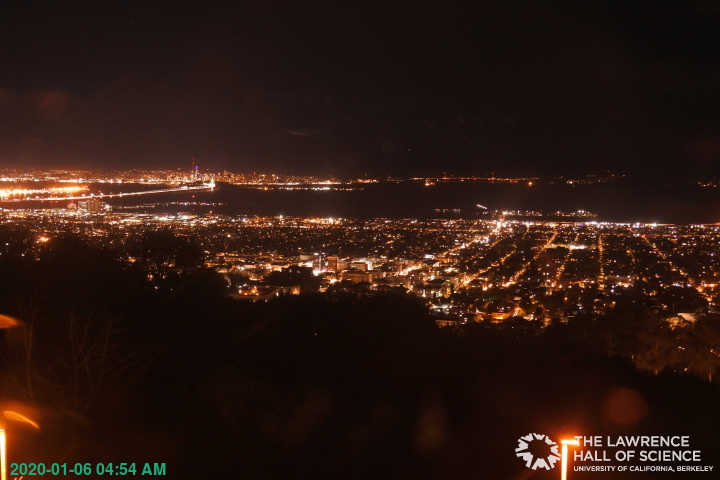

In [10]:
Embed

Here is today's image from same webcam at Berkeley, (refreshed every minutes, if you reload the notebook), visible only with an active internet connection, that should be different from the previous one. Notebooks saved with this kind of image will be smaller and always reflect the current version of the source, but the image won't display offline.

In [11]:
SoftLinked

Of course, if you re-run this Notebook, the two images will be the same again.

## HTML

Python objects can declare HTML representations that will be displayed in the Notebook. If you have some HTML you want to display, simply use the `HTML` class.

In [12]:
from IPython.display import HTML

In [13]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [14]:
h = HTML(s)

In [15]:
display(h)

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


You can also use the `%%html` cell magic to accomplish the same thing.

In [16]:
%%html
<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


## JavaScript

The Notebook also enables objects to declare a JavaScript representation. At first, this may seem odd as  output is inherently visual and JavaScript is a programming language. However, this opens the door for rich output that leverages the full power of JavaScript and associated libraries such as [d3.js](http://d3js.org) for output.

In [17]:
from IPython.display import Javascript

Pass a string of JavaScript source code to the `JavaScript` object and then display it.

In [18]:
js = Javascript('alert("hi")');

In [19]:
display(js)

<IPython.core.display.Javascript object>

The same thing can be accomplished using the `%%javascript` cell magic:

In [20]:
%%javascript

alert("hi");

<IPython.core.display.Javascript object>

## LaTeX

The IPython display system also has builtin support for the display of mathematical expressions typeset in LaTeX, which is rendered in the browser using [MathJax](http://mathjax.org).

You can pass raw LaTeX test as a string to the `Math` object:

In [21]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

With the `Latex` class, you have to include the delimiters yourself.  This allows you to use other LaTeX modes such as `eqnarray`:

In [22]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

Or you can enter LaTeX directly with the `%%latex` cell magic:

In [23]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

## Audio

IPython makes it easy to work with sounds interactively. The `Audio` display class allows you to create an audio control that is embedded in the Notebook. The interface is analogous to the interface of the `Image` display class. All audio formats supported by the browser can be used. Note that no single format is presently supported in all browsers.

In [24]:
from IPython.display import Audio
Audio(url="http://www.nch.com.au/acm/8k16bitpcm.wav")

A NumPy array can be auralized automatically. The `Audio` class normalizes and encodes the data and embeds the resulting audio in the Notebook.

For instance, when two sine waves with almost the same frequency are superimposed a phenomena known as [beats](https://en.wikipedia.org/wiki/Beat_%28acoustics%29) occur. This can be auralised as follows:

In [25]:
import numpy as np
max_time = 3
f1 = 220.0
f2 = 224.0
rate = 8000
L = 3
times = np.linspace(0,L,rate*L)
signal = np.sin(2.0*np.pi*f1*times) + np.sin(2.0*np.pi*f2*times)

Audio(data=signal, rate=rate)

## Video

More exotic objects can also be displayed, as long as their representation supports the IPython display protocol.  For example, videos hosted externally on YouTube are easy to load:

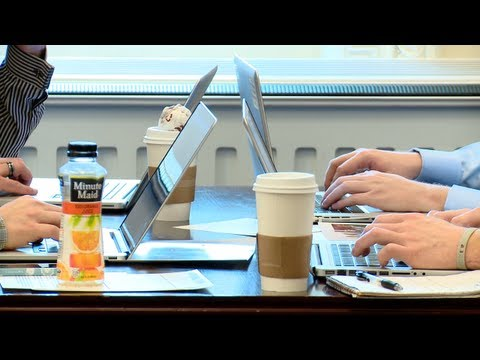

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('sjfsUzECqK0')

Using the nascent video capabilities of modern browsers, you may also be able to display local
videos.  At the moment this doesn't work very well in all browsers, so it may or may not work for you;
we will continue testing this and looking for ways to make it more robust.  

The following cell loads a local file called  `animation.m4v`, encodes the raw video as base64 for http
transport, and uses the HTML5 video tag to load it. On Chrome 15 it works correctly, displaying a control bar at the bottom with a play/pause button and a location slider.

In [27]:
from IPython.display import HTML
from base64 import b64encode
video = open("../images/animation.m4v", "rb").read()
video_encoded = b64encode(video).decode('ascii')
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

## External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia
page for mobile users:

In [28]:
from IPython.display import IFrame
IFrame('http://jupyter.org', width='100%', height=350)

## Links to local files

IPython provides builtin display classes for generating links to local files. Create a link to a single file using the `FileLink` object:

In [29]:
from IPython.display import FileLink, FileLinks
FileLink('Cell Magics.ipynb')

/p/project/ccstvs/jupyter/j4j_notebooks/001-Tutorials/003-IPython-in-Depth/examples/IPython Kernel/Cell Magics.ipynb

Alternatively, to generate links to all of the files in a directory, use the `FileLinks` object, passing `'.'` to indicate that we want links generated for the current working directory. Note that if there were other directories under the current directory, `FileLinks` would work in a recursive manner creating links to files in all sub-directories as well.

In [30]:
FileLinks('.')

./
  Third Party Rich Output.ipynb
  Raw Input in the Notebook.ipynb
  papermill_Terminal Usage.ipynb
  papermill_Plotting in the Notebook.ipynb
  papermill_Beyond Plain Python.ipynb
  papermill_Cell Magics.ipynb
  Importing Notebooks.ipynb
  Beyond Plain Python.ipynb
  papermill_Trapezoid Rule.ipynb
  papermill_Working With External Code.ipynb
  papermill_Custom Display Logic.ipynb
  ipython-get-history.py
  Working With External Code.ipynb
  example-demo.py
  papermill_Script Magics.ipynb
  papermill_Index.ipynb
  Plotting in the Notebook.ipynb
  papermill_Importing Notebooks.ipynb
  Custom Display Logic.ipynb
  Index.ipynb
  SymPy.ipynb
  papermill_Animations Using clear_output.ipynb
  papermill_Rich Output.ipynb
  papermill_Raw Input in the Notebook.ipynb
  Script Magics.ipynb
  Animations Using clear_output.ipynb
  Terminal Usage.ipynb
  papermill_Capturing Output.ipynb
  papermill_Old Custom Display Logic.ipynb
  papermill_Background Jobs.ipynb
  papermill_Updating Displays.ipynb
  Rich Output.ipynb
  papermill_Third Party Rich Output.ipynb
  Trapezoid Rule.ipynb
  Old Custom Display Logic.ipynb
  ipython-completion.bash
  Cell Magics.ipynb
  Background Jobs.ipynb
  Capturing Output.ipynb
  papermill_SymPy.ipynb
  Updating Displays.ipynb
./.ipynb_checkpoints/
  SymPy-checkpoint.ipynb
  Plotting in the Notebook-checkpoint.ipynb
  ipython-completion-checkpoint.bash
  Importing Notebooks-checkpoint.ipynb
  Background Jobs-checkpoint.ipynb
  Raw Input in the Notebook-checkpoint.ipynb
  Animations Using clear_output-checkpoint.ipynb
  ipython-get-history-checkpoint.py
  Custom Display Logic-checkpoint.ipynb
  Third Party Rich Output-checkpoint.ipynb
  Trapezoid Rule-checkpoint.ipynb
  Terminal Usage-checkpoint.ipynb
  example-demo-checkpoint.py
  Capturing Output-checkpoint.ipynb
  Working With External Code-checkpoint.ipynb
  Cell Magics-checkpoint.ipynb
  Rich Output-checkpoint.ipynb
  Script Magics-checkpoint.ipynb
  Beyond Plain Python-checkpoint.ipynb
  Old Custom Display Logic-checkpoint.ipynb
  Updating Displays-checkpoint.ipynb
./__pycache__/
  mod.cpython-36.pyc
./data/
  flare.json
./gui/
  gui-qt.py
  gui-glut.py
  gui-pyglet.py
  gui-gtk3.py
  gui-wx.py
  gui-gtk.py
  gui-tk.py
./gui/.ipynb_checkpoints/
  gui-qt-checkpoint.py
./nbpackage/
  __init__.py
  papermill_mynotebook.ipynb
  mynotebook.ipynb
./nbpackage/.ipynb_checkpoints/
  mynotebook-checkpoint.ipynb
./nbpackage/__pycache__/
  __init__.cpython-36.pyc
./nbpackage/nbs/
  __init__.py
  other.ipynb
  papermill_other.ipynb
./nbpackage/nbs/__pycache__/
  __init__.cpython-36.pyc

## Rich output and security

The IPython Notebook allows arbitrary code execution in both the IPython kernel and in the browser, though HTML and JavaScript output. More importantly, because IPython has a JavaScript API for running code in the browser, HTML and JavaScript output can actually trigger code to be run in the kernel. This poses a significant security risk as it would allow IPython Notebooks to execute arbitrary code on your computers.

To protect against these risks, the IPython Notebook has a security model that specifies how dangerous output is handled. Here is a short summary:

* When you run code in the Notebook, all rich output is displayed.
* When you open a notebook, rich output is only displayed if it doesn't contain security vulberabilities, ...
* ... or if you have trusted a notebook, all rich output will run upon opening it.

A full description of the IPython security model can be found on [this page](http://ipython.org/ipython-doc/dev/notebook/security.html).

## Rich output and nbviewer

Much of the power of the Notebook is that it enables users to share notebooks with each other using http://nbviewer.ipython.org, without installing IPython locally. As of IPython 2.0, notebooks rendered on nbviewer will display all output, including HTML and JavaScript. Furthermore, to provide a consistent JavaScript environment on the live Notebook and nbviewer, the following JavaScript libraries are loaded onto the nbviewer page, *before* the notebook and its output is displayed:

* [jQuery](http://jquery.com/)
* [RequireJS](http://requirejs.org/)

Libraries such as [mpld3](http://mpld3.github.io/) use these capabilities to generate interactive visualizations that work on nbviewer.